### 多层感知器和卷积神经网络的差异主要是:
- #### 卷积神经网络增加了卷积层1，池化层1，卷积层2，池化层2的处理来提取特征


![avatar](./lesson_img/1.jpg)

## 卷积神经网络介绍
- ### 图像的特征提取：
    通过卷积层1，池化层1，卷积层2，池化层2提取图像的特征
   
- ### 完全连接的神经网络
     包含平坦层，隐藏层，输出层，所组成的类神经网络，如下图所示
     
     ![avtar](./lesson_img/2.jpg)

### 卷积层的意义是将原本一个图像经过卷积运算产生多个图像，就好像将相片叠加起来

- ## 建立卷积神经网络识别MNIST数据集

    #### 步骤如下所示
    
    
 ![](./lesson_img/3.jpg)


---

- ## 1 数据预处理
### 卷积神经网络与多层感知器进行预处理的方式不同  
    - **多层感知器**： img.reshape(60000, 784)   
        说明：多层感知器因为直接送神经元处理，所以reshape转换为60000项，每一项有784个数字，作为784个神经元的输入
   
    - **卷积神经网络**：img.reshape(60000, 28, 28, 1)   
        说明：卷积神经网络因为必须先进行卷积与池化运算，所以必须保持图像的维数，所以reshape转换为60000项，每一项是28×28×1的图像，分别是28（宽）×28（高）×1（单色）

In [1]:
# 1. 导入所需模块
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

np.random.seed(10)

In [2]:
# 2.读取mnist数据集
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train.shape

(60000, 28, 28)

In [4]:
# 3. 将features（数字图像的特征值）转换为四维矩阵
# 以reshape 转换为 60000*28*28*1的四维矩阵
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [6]:
# 查看转换后的形状
print(x_Test4D.shape)
print(x_Train4D.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [8]:
# 4. 将features（数字图像的特征值）标准化
# 将features标准化可以提高模型预测的精确度，并且更快收敛
x_Test4D_normalize = x_Test4D / 255
x_Train4D_normalize = x_Train4D / 255

In [12]:
# 5. label（数字图像的真实值）进行 OneHot编码
# 使用np_utils.to_categorical 将训练数据与测试数据的label进行 One-Hot Encoding （一位有效编码）转换
y_Train_Onehot = np_utils.to_categorical(y_Train)
y_Test_Onehot = np_utils.to_categorical(y_Test)

***

- ## 2 建立模型

![](./lesson_img/4.jpg)

In [13]:
# 1 导入所需模块
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [14]:
# 2 建立keras的Sequential模型
model = Sequential()

#### #3. 建立卷积层1 和 池化层1
#### 一个完整的卷积运算包含一个卷积层和一个池化层

In [15]:
# 建立卷积层1
# 使用如下代码建立卷积层1。 输入的数字图像大小为28*28，进行一次卷积运算会产生16个图像，卷积运算不会改变图像的大小，所以图像的大小仍是28*28
model.add(Conv2D(filters=16,
                                kernel_size=(5,5),
                                padding='same',
                                input_shape=(28, 28, 1),
                                activation='relu'))

#### 以上程序把Conv2D层加入模型中，需输入一下参数
- **filters=16**：建立16个滤镜（每个滤镜看到的图片不同，相当于生成了16个图片）
- **kernel_size=(5, 5)**：每个滤镜5×5大小
- **padding='same'**：此设置让卷积运算产生的卷积图像大小不变
- **input_shape=(28, 28, 1)**： 第一、二维：代表输入的图像形状为28×28，第三维：因为是单色灰度图像，所以最后维数是1
- **activation='relu'**： 设置ReLU激活函数

![](./lesson_img/5.jpg)

In [16]:
# 建立池化层1，输入参数pool_size=(2, 2)，执行第一次缩减采样。将28*28的图像缩小为 14*14
model.add(MaxPooling2D(pool_size=(2, 2)))

#### 建立卷积层2和池化层2

In [17]:
# 建立卷积层2
# 使用如下代码建立卷积层2。 执行第二次卷积运算：将原本的16个图像转换为36个图像，卷积运算不会改变图像的大小，所以图像的大小仍是14*14
model.add(Conv2D(filters=36,
                                kernel_size=(5,5),
                                padding='same',
                                activation='relu'))

![](./lesson_img/6.jpg)

#### #4. 建立池化层2，并且加入DropOut避免过度拟合

In [18]:
# 下面的程序代码建立池化层2，输入参数pool_size=(2, 2)，执行第二次缩减采样，将36个14*14的图形缩减为36个7*7的图形
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
# 下面的程序代码把DropOut(0.25)层加入模型中，其功能是：每次迭代时，会随机在神经网络中放弃25%的神经元，避免过度拟合
model.add(Dropout(0.25))

#### #5.建立神经网络（平坦层，隐藏层，输出层）

In [20]:
# 建立平坦层
# 一下代码将平坦层加入模型，将之前的步骤已经建立的池化层2，共有36个7*7的图像转换为一维的向量，长度是36*7*7=1764，
# 也就是1764个float数，正好对应1764个神经元
model.add(Flatten())

In [21]:
# 建立隐藏层, 共有128个神经元
model.add(Dense(128, activation='relu'))

In [22]:
# 并且把DropOut加入模型中，DropOut(0.5)的功能是，每次训练迭代时，会随机的在神经网络中放弃50%的神经元，以避免过度拟合
model.add(Dropout(0.5))

In [23]:
# 最后建立输出层，共有10个神经元，对应 0-9的数字，并且使用softmax激活函数进行转换，softmax可以将神经元的输出转换为预测每一个数字的概率
model.add(Dense(10, activation='softmax'))

In [24]:
# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

![](./lesson_img/7.jpg)

***

- ##  3 进行训练
    **当我们建立好深度学习模型后，就可以使用[反向传播法]进行训练**

In [26]:
# 1.在训练模型之前，必须对模型进行编译工作  （compile方法对模型进行设置）
# 需输入三个参数，参考上节
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

![](./lesson_img/8.jpg)

In [27]:
# 2. 开始训练
train_history = model.fit(x=x_Train4D_normalize, y=y_Train_Onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 75s - loss: 0.4891 - acc: 0.8479 - val_loss: 0.0963 - val_acc: 0.9724
Epoch 2/10
 - 74s - loss: 0.1390 - acc: 0.9589 - val_loss: 0.0624 - val_acc: 0.9806
Epoch 3/10
 - 74s - loss: 0.1011 - acc: 0.9697 - val_loss: 0.0510 - val_acc: 0.9843
Epoch 4/10
 - 77s - loss: 0.0837 - acc: 0.9750 - val_loss: 0.0462 - val_acc: 0.9863
Epoch 5/10
 - 82s - loss: 0.0710 - acc: 0.9777 - val_loss: 0.0395 - val_acc: 0.9878
Epoch 6/10
 - 81s - loss: 0.0636 - acc: 0.9808 - val_loss: 0.0389 - val_acc: 0.9885
Epoch 7/10
 - 82s - loss: 0.0555 - acc: 0.9831 - val_loss: 0.0419 - val_acc: 0.9883
Epoch 8/10
 - 89s - loss: 0.0508 - acc: 0.9845 - val_loss: 0.0334 - val_acc: 0.9905
Epoch 9/10
 - 79s - loss: 0.0442 - acc: 0.9866 - val_loss: 0.0332 - val_acc: 0.9906
Epoch 10/10
 - 83s - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0329 - val_acc: 0.9901


In [28]:
# 建立show_train_history显示训练过程
# 可以使用如下方法，读取train_history，以图表显示训练过程。
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

#### 显示准确率执行结果

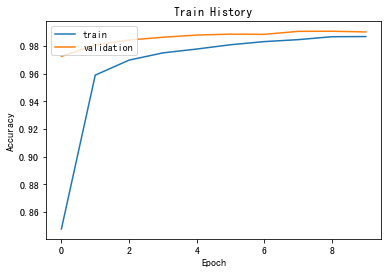

In [29]:
show_train_history(train_history, 'acc', 'val_acc')

#### 画出误差执行结果

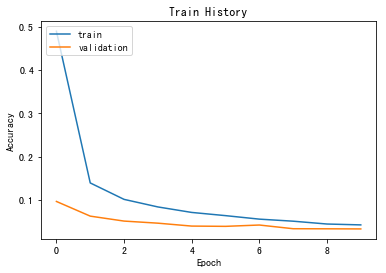

In [30]:
show_train_history(train_history, 'loss', 'val_loss')

***

- ## 4 评估模型准确率

In [33]:
scores = model.evaluate(x_Test4D_normalize, y_Test_Onehot)
scores[1]

10000/10000 [==============================] - 7s 692us/step


0.9911

![](./lesson_img/9.jpg)

- ## 5 进行预测

In [37]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
        pass
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1) #建立 subgraph子图形 为 5行 5列
        ax.imshow(images[idx], cmap='binary') # 画出 subgraph 子图形
        title= 'label=' + str(labels[idx]) # 设置子图形的title， 显示标签字段
        if len(prediction)>0: # 如果传入的预测结果
            title += ', predict='+str(prediction[idx]) # 标题
        ax.set_title(title, fontsize=10) # 设置子图形的标题
        ax.set_xticks([]) # 设置不显示刻度
        ax.set_yticks([])
        idx+=1
    plt.show()

In [35]:
prediction = model.predict_classes(x_Test4D_normalize)

In [36]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

### 显示前10项的预测结果

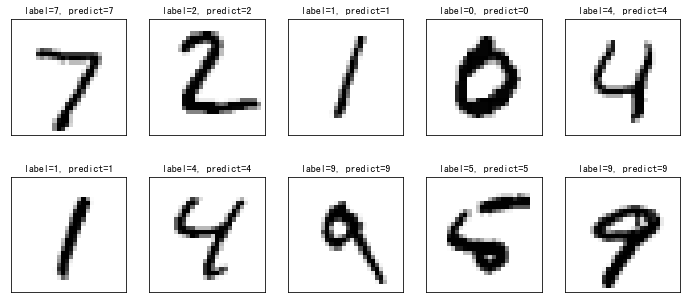

In [38]:
plot_images_labels_prediction(x_Test, y_Test, prediction, 0)

- ## 6 显示混淆矩阵

In [39]:
import pandas as pd

In [40]:
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1130,1,1,0,1,0,1,1,0
2,1,2,1024,0,1,0,0,2,2,0
3,0,0,0,1006,0,0,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,7,0,881,2,0,0,1
6,4,2,0,1,1,1,948,0,1,0
7,0,1,5,3,0,0,0,1015,1,3
8,1,0,2,2,1,0,0,2,962,4


![](./lesson_img/10.jpg)